__Tf DS_F 3.3.7__ 

_Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples._

_For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen._

_Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?_

_Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?_

_Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?_



_Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples._


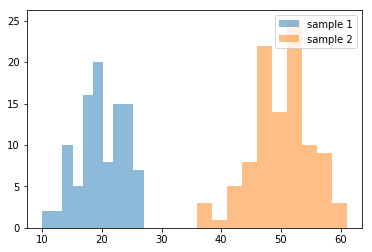

population 1 mean: 20.06 std: 3.8388018964254984
population 2 mean: 49.81 std: 4.828446955284898


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pop1 = np.random.binomial(100,0.2,10000)
pop2 = np.random.binomial(100,0.5,10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

print('population 1 mean:',sample1.mean(),'std:',sample1.std())

print('population 2 mean:',sample2.mean(),'std:',sample2.std())



_Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?_

When we increase the sample size from 100 to 1000, I would expect the mean to approach closer to p*n (20 and 50 for groups 1 and 2 respectively), and standard deviation
to decrease. 

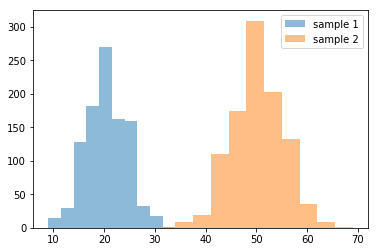

population 1 mean: 20.175 std: 3.9573191683259514
population 2 mean: 49.955 std: 4.972220328987845


In [22]:
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

print('population 1 mean:',sample1.mean(),'std:',sample1.std())

print('population 2 mean:',sample2.mean(),'std:',sample2.std())

Indeed, the mean is very close to p*n (20 and 50 for groups 1 and 2 respectively), while the standard deviations decreased. Also, the distributions are similar to random variables.

When we reduce the sample size to 20, I would expect the means to deviate from p*n (20 and 50 for groups 1 and 2 respectively)


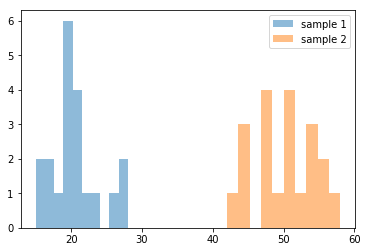

population 1 mean: 20.55 std: 3.3537292675468007
population 2 mean: 50.0 std: 4.183300132670378


In [23]:
sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

print('population 1 mean:',sample1.mean(),'std:',sample1.std())

print('population 2 mean:',sample2.mean(),'std:',sample2.std())

Here, the distribution is less of a normal form with less samples.

_Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?_

pop1 = np.random.binomial(100,0.3,10000)
pop2 = np.random.binomial(100,0.5,10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

In [28]:
pop1 = np.random.binomial(100,0.4,10000)
sample1 = np.random.choice(pop1, 100, replace=True)
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=11.085041651768073, pvalue=2.7461787287112016e-22)


The p-value does increase since the distributions are relatively closer, but in both cases they are pretty low. If we reduce
sample size to 20, the p-value incrases but is still low

In [32]:
sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=5.482324762038021, pvalue=4.1529013055394664e-06)


Next, we use the Poisson distribution instead of Bernoulli.

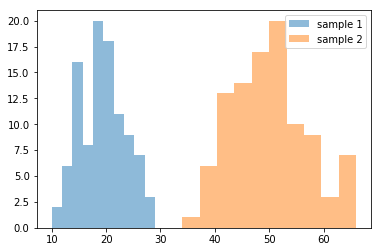

population 1 mean: 19.3 std: 4.337049688440288
population 2 mean: 50.08 std: 7.023788151702755


In [35]:
pop1 = np.random.poisson(20,10000)
pop2 = np.random.poisson(50,10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

print('population 1 mean:',sample1.mean(),'std:',sample1.std())

print('population 2 mean:',sample2.mean(),'std:',sample2.std())


In [36]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=37.09998004926082, pvalue=6.050971085838229e-82)


The means still fairly represent the population values, particularly for population 2.